In [1]:
# script to plot TTS for all UT segments 
# date created: 3/3/2020
# author: sofia chelpon

In [1]:
############ --------------- PREP WORKSPACE --------------- ###########
import numpy as np 
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
%config inlinebackend.figure_format='retina'

# import my TTS module, need to add path to folder
import sys
sys.path.insert(1, '/Volumes/scdrive2/TTS_2020/base_tts_code/')
import tts_mod

In [2]:
############ --------------- LOAD SEGMENT DATA --------------- ###########
utbl_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl/utbl_allseg_campavgbl.pkl')
mustar_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl/mustar_allseg_campavgbl.pkl')
tau_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl/tau_allseg_campavgbl.pkl')
t_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl/t_allseg_campavgbl.pkl')
gf_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl/gf_allseg_campavgbl.pkl')
seg_info = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl/segment_info_campavgbl.pkl')

In [3]:
neg = np.where(seg_info['mode age'] < 0)
neg = 16
seg_info = seg_info.drop(index = neg)
t_allseg.drop(t_allseg.columns[neg], axis=1,inplace=True)
gf_allseg.drop(gf_allseg.columns[neg], axis=1,inplace=True)
tau_allseg.drop(tau_allseg.columns[neg], axis=1,inplace=True)
mustar_allseg.drop(mustar_allseg.columns[neg], axis=1,inplace=True)
utbl_allseg.drop(utbl_allseg.columns[neg], axis=1,inplace=True)

In [4]:
# DO NOT filter by r^2 values 

In [5]:
############ --------------- LOAD CAMPAIGN AVERAGE DATA --------------- ###########
campaign_avg_figa = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_tau/campaign_avg_figa.pkl')
campaign_avg_figb = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_tau/campaign_avg_figb.pkl')
campaign_avg_stats = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_tau/campaign_avg_stats.pkl')

campav_tau = campaign_avg_figa['tau'].values
campav_mustar = campaign_avg_figa['mustar'].values
campav_utbl = campaign_avg_figa['utbl'].values
campav_r2 = campaign_avg_stats['r squared'].values
campav_r2 = campav_r2[0]
campav_gf = campaign_avg_figb['gf'].values
campav_t = campaign_avg_figb['t'].values
campav_mean_age = campaign_avg_stats['mean age'].values
campav_mean_age = campav_mean_age[0]
campav_mode_age = campaign_avg_stats['mode age'].values
campav_mode_age = campav_mode_age[0]

In [6]:
############ --------------- FIND MIN/MAX CURVES --------------- ###########
min_mode_loc = np.argmin(seg_info['mode age']) 
max_mode_loc = np.argmax(seg_info['mode age']) 

min_mean_age = np.min(seg_info['mean age']) 
max_mean_age = np.max(seg_info['mean age']) 
print(min_mean_age, max_mean_age)

min_mode_age = np.min(seg_info['mode age']) 
max_mode_age = np.max(seg_info['mode age']) 
print(min_mode_age, max_mode_age)

# utbl  
min_utbl = utbl_allseg[min_mode_loc].values
max_utbl = utbl_allseg[max_mode_loc].values

min_r2 = np.min(seg_info['r squared']) 
max_r2 = np.max(seg_info['r squared']) 

min_mustar = mustar_allseg[min_mode_loc].values
max_mustar = mustar_allseg[max_mode_loc].values

min_tau = tau_allseg[min_mode_loc].values
max_tau = tau_allseg[max_mode_loc].values

min_gf = gf_allseg[min_mode_loc].values
max_gf = gf_allseg[max_mode_loc].values

min_t = t_allseg[min_mode_loc].values
max_t = t_allseg[max_mode_loc].values

1.708359029100782 29.475308642015285
0.5390630472175808 7.7890630472175815


//anaconda3/envs/py3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)
//anaconda3/envs/py3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


In [7]:
###########################################################################################
###########################################################################################
###########################################################################################

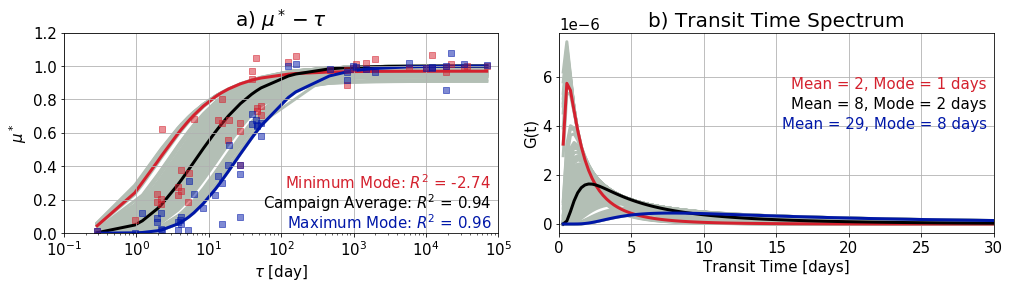

In [8]:
############ --------------- PLOT IT! --------------- ###########
add_meanmode = 0
add_scatter = 0
add_r2 = 0

for idx in np.arange(0, (len(gf_allseg.columns))):
    # pull that column 
    my_r2 = seg_info['r squared'].iloc[idx]
    mean_age = seg_info['mean age'].iloc[idx]
    mode_age = seg_info['mode age'].iloc[idx]
    #
    my_tau = tau_allseg.iloc[:,idx].values
    my_mustar = mustar_allseg.iloc[:,idx].values
    my_utbl = utbl_allseg.iloc[:,idx].values
    #
    my_gf = gf_allseg.iloc[:,idx].values
    my_t = t_allseg.iloc[:,idx].values
    
    if ((np.isfinite(mean_age) == True) & (np.isfinite(mode_age) == True)):
        # plotting factors 
        title_str = ' '
        my_color = [0.70, 0.75, 0.71] #ash gray    add_scatter = 0
        add_r2 = 0
        add_meanmode = 0
        #plot 
        if (idx == 0):
            overplot = 0
            width = 0
            height = 0
            my_ax = 0
        
            fig, my_ax, width, height = tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
        else: 
            overplot = 1
            tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
# add extremes with scatter and r^2 
add_meanmode = 1 
add_scatter = 1
add_r2 = 1 

# colors
myred = [0.83, 0.13, 0.18] 
myblue = [0, 0.09, 0.66]

# minimum 
overplot = 1
add_meanmode = 1 
add_scatter = 1
add_r2 = 1 
title_str = 'Minimum Mode: '
my_color = myred
tts_mod.plot_tts(min_tau, min_mustar, min_utbl, min_r2, 
                        min_gf, min_t, min_mean_age, min_mode_age, 
                        my_color, overplot, add_scatter, add_r2, add_meanmode, 
                        my_ax, width, height, title_str)

# campaign average
overplot = 2
add_meanmode = 1 
add_scatter = 0
add_r2 = 1 
title_str = 'Campaign Average: '
my_color = 'k'
tts_mod.plot_tts(campav_tau, campav_mustar, campav_utbl, campav_r2, 
                        campav_gf, campav_t, campav_mean_age, campav_mode_age, 
                        my_color, overplot, add_scatter, add_r2, add_meanmode, 
                        my_ax, width, height, title_str)
# maximum 
overplot = 3
add_meanmode = 1 
add_scatter = 1
add_r2 = 1 
title_str = 'Maximum Mode: '
my_color = myblue
tts_mod.plot_tts(max_tau, max_mustar, max_utbl, max_r2, 
                        max_gf, min_t, max_mean_age, max_mode_age, 
                        my_color, overplot, add_scatter, add_r2, add_meanmode, 
                        my_ax, width, height, title_str)

# add grid
ax0, ax1 = my_ax
ax0.grid(which = 'major')
ax1.grid(which = 'major')

# --------------- save figure 
svpath = '/Volumes/scdrive2/TTS_2020/get_tts/figures/'
#fig.savefig(svpath + 'tts_vary_ut_noscreen.pdf')  


In [9]:
###########################################################################################
###########################################################################################
###########################################################################################

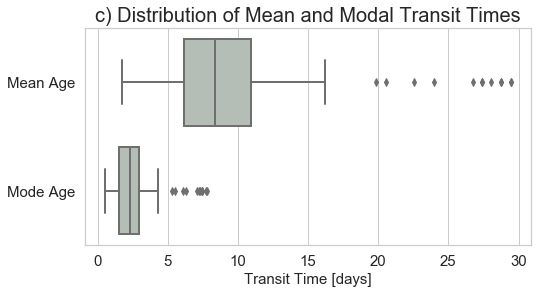

In [12]:
############ --------------- MEAN, MODE BOXPLOTS --------------- ###########
# isolate mean and mode 
seg_info_clip = pd.DataFrame()
seg_info_clip['Mean Age'] = seg_info['mean age'].values
seg_info_clip['Mode Age'] = seg_info['mode age'].values

# plot 
mygray = [0.70, 0.75, 0.71]

fig, ax = plt.subplots(figsize=(8, 4), ncols=1)
sns.set(font_scale=1)
sns.set_style("whitegrid")
ax = sns.boxplot(data = seg_info_clip, linewidth = 2, orient = 'h', color = mygray)
ax.grid(which = 'minor')
sns.set_style("whitegrid")
ax.set_title('c) Distribution of Mean and Modal Transit Times', fontsize = 20)
ax.set_xlabel("Transit Time [days]" ,fontsize=15)
ax.tick_params(labelsize=15)

# --------------- save figure 
svpath = '/Volumes/scdrive2/TTS_2020/get_tts/figures/'
#fig.savefig(svpath + 'boxplot_vary_ut_noscreen.pdf')  

In [15]:
###########################################################################################
###########################################################################################
###########################################################################################

In [116]:
############ --------------- MEAN, MODE BOXPLOTS PER RF --------------- ###########
# isolate mean and mode 
means_perrf = pd.DataFrame()
means_perrf['Mean Age'] = seg_info['mean age'].values
means_perrf['Research Flight'] = seg_info['Flight'].values
seg_avg_mean = means_perrf['Mean Age'].mean()
print(seg_avg_mean)

modes_perrf = pd.DataFrame()
modes_perrf['Research Flight'] = seg_info['Flight'].values
modes_perrf['Mode Age'] = seg_info['mode age'].values
seg_avg_mode = modes_perrf['Mode Age'].mean()
print(seg_avg_mode)

9.44850585459375
2.4905020751550064


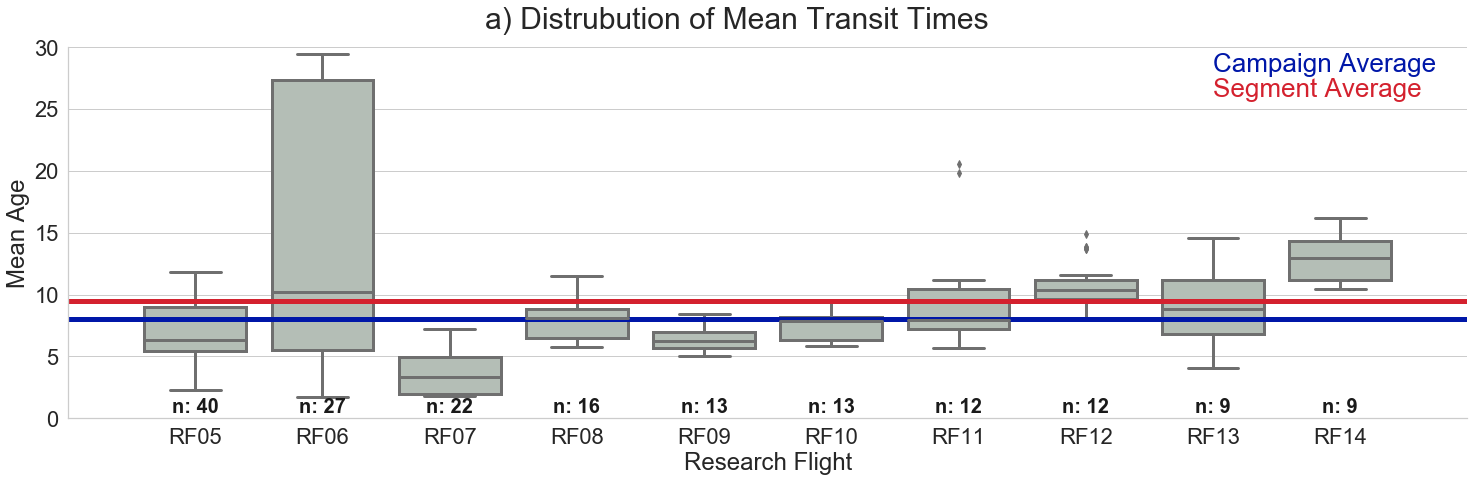

In [117]:
# plot - MEANS 
sns.set(font_scale=2)
sns.set_style("whitegrid")

g = sns.catplot(x = 'Research Flight', y = 'Mean Age', data = means_perrf, \
                kind = 'box', color = mygray, height=7, aspect=3, linewidth = 3)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('a) Distrubution of Mean Transit Times',  fontsize = 30)

plt.plot([-1, 10], [seg_avg_mean, seg_avg_mean], linewidth = 5, color = myred)
plt.plot([-1, 10], [campav_mean_age, campav_mean_age], linewidth = 5, color = myblue)

plt.text(8, 28, 'Campaign Average', color = myblue, fontsize = 26)
plt.text(8, 26, 'Segment Average', color = myred, fontsize = 26)

plt.xlim([-1, 10])
plt.ylim([0, 30])

# counts 
nobs = means_perrf['Research Flight'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

# Add it to the plot
for idx, nn in enumerate(nobs):
    plt.text(idx, 0.5, nn, horizontalalignment='center',  
             fontsize=20, color='k', weight='bold')

# --------------- save figure 
svpath = '/Volumes/scdrive2/TTS_2020/get_tts/figures/'
#fig.savefig(svpath + 'boxplot_vary_ut_means_noscreen.pdf')  

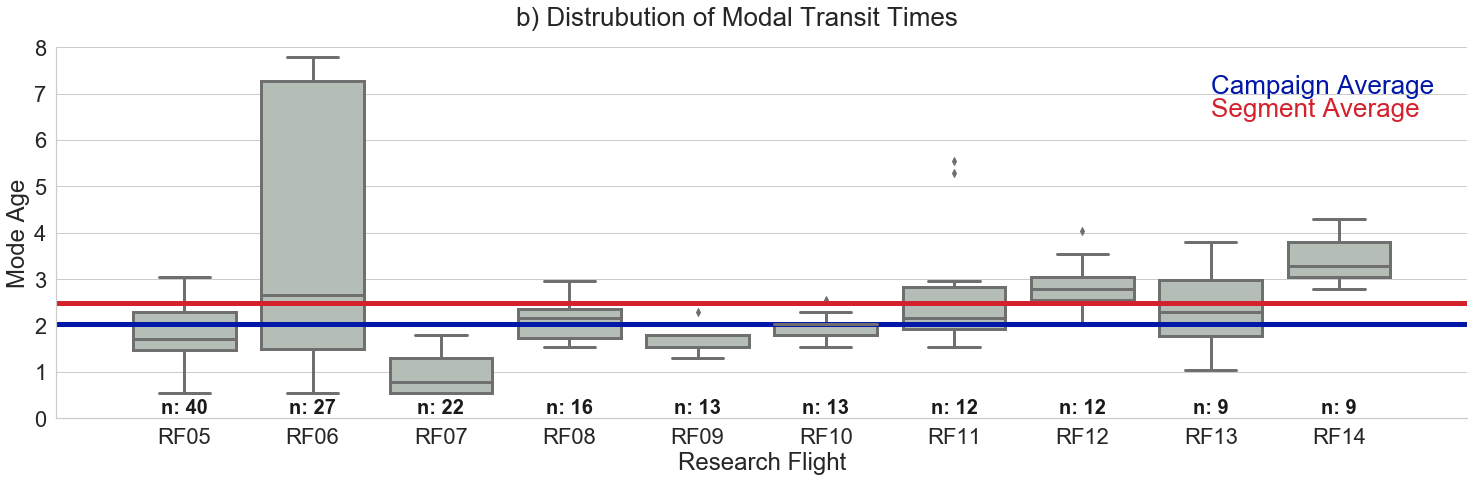

In [118]:
# plot - MODES
sns.set(font_scale=2)
sns.set_style("whitegrid")

mygray = [0.70, 0.75, 0.71]
myred = [0.83, 0.13, 0.18] 
myblue = [0, 0.09, 0.66]

g = sns.catplot(x = 'Research Flight', y = 'Mode Age', data = modes_perrf, \
                kind = 'box', color = mygray, height=7, aspect=3, linewidth = 3)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('b) Distrubution of Modal Transit Times',  fontsize = 26)

plt.plot([-1, 10], [seg_avg_mode, seg_avg_mode], linewidth = 5, color = myred)
plt.plot([-1, 10], [campav_mode_age, campav_mode_age], linewidth = 5, color = myblue)

plt.text(8, 7, 'Campaign Average', color = myblue, fontsize = 26)
plt.text(8, 6.5, 'Segment Average', color = myred, fontsize = 26)

plt.xlim([-1, 10])
plt.ylim([0, 8])

# counts 
nobs = modes_perrf['Research Flight'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

# Add it to the plot
for idx, nn in enumerate(nobs):
    plt.text(idx, 0.1, nn, horizontalalignment='center',  
             fontsize=20, color='k', weight='bold')

# --------------- save figure 
svpath = '/Volumes/scdrive2/TTS_2020/get_tts/figures/'
#fig.savefig(svpath + 'boxplot_vary_ut_modes_noscreen.pdf')  

In [28]:
########################################################################################
########################################################################################